In [14]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import keras

In [18]:
#load dataset
import scipy.io          
dataset = scipy.io.loadmat('/Users/allsunzhang/desktop/AI/A2/dataset.mat')

In [58]:
# get training and testing sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

print(x_train)



[[[0.31869477 0.2647031  0.21069678 ... 0.73730607 0.60689646 0.83849385]
  [0.27841038 0.35074994 0.29601582 ... 0.72570228 0.79638263 0.76662124]
  [0.21685647 0.34094631 0.11451978 ... 0.85599672 0.6718471  0.70351348]
  ...
  [0.13055801 0.27388459 0.4922944  ... 0.83069905 0.75323952 0.71195647]
  [0.1989054  0.2492883  0.40299187 ... 0.17380092 0.36220497 0.15890988]
  [0.24754825 0.34144105 0.         ... 0.27986344 0.15280698 0.22390652]]

 [[0.19910152 0.37254352 0.17724996 ... 0.22551105 0.46162289 0.34233537]
  [0.48241379 0.47066453 0.41481255 ... 0.35099083 0.23763171 0.20022872]
  [0.35446131 0.49847482 0.38347327 ... 0.26170712 0.20087091 0.32889656]
  ...
  [0.34538634 0.19752572 0.29969349 ... 0.13913981 0.20809406 0.24620512]
  [0.22960345 0.10071491 0.35922832 ... 0.15113418 0.25645343 0.30511359]
  [0.36328574 0.         0.26347971 ... 0.14753392 0.14434891 0.3705253 ]]

 [[0.04821028 0.15757024 0.37677784 ... 0.12971314 0.26180299 0.30666152]
  [0.18264845 0.155943

In [20]:
# print package version 
print('numpy:', np.__version__)
print('scipy:', sp.__version__)
print('matplotlib:', matplotlib.__version__)
print('iPython:', IPython.__version__)
print('scikit-learn:', sklearn.__version__)
print('keras: ', keras.__version__)
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

numpy: 1.14.2
scipy: 1.0.1
matplotlib: 2.2.2
iPython: 6.3.1
scikit-learn: 0.19.1
keras:  2.1.6
Tensorflow:  1.8.0


In [21]:
# import keras packages
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K

In [22]:
# batch size for gradient descent
batch_size = 32
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200 # try a larger number of epochs here (for example 10 or larger)
# input image dimensions
nmb_samples, img_rows, img_cols = x_train.shape[0], x_train.shape[1], x_train.shape[2]
nmb_test_samples = x_test.shape[0]

In [74]:
# adjust training image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(x_train)


[[[[0.31869477]
   [0.2647031 ]
   [0.21069679]
   ...
   [0.73730606]
   [0.60689646]
   [0.8384938 ]]

  [[0.27841038]
   [0.35074994]
   [0.29601583]
   ...
   [0.7257023 ]
   [0.7963826 ]
   [0.76662123]]

  [[0.21685648]
   [0.34094632]
   [0.11451978]
   ...
   [0.8559967 ]
   [0.6718471 ]
   [0.7035135 ]]

  ...

  [[0.13055801]
   [0.2738846 ]
   [0.4922944 ]
   ...
   [0.830699  ]
   [0.7532395 ]
   [0.71195644]]

  [[0.19890541]
   [0.2492883 ]
   [0.40299186]
   ...
   [0.17380092]
   [0.36220497]
   [0.15890989]]

  [[0.24754825]
   [0.34144107]
   [0.        ]
   ...
   [0.27986345]
   [0.15280698]
   [0.22390652]]]


 [[[0.19910152]
   [0.3725435 ]
   [0.17724997]
   ...
   [0.22551104]
   [0.4616229 ]
   [0.34233537]]

  [[0.4824138 ]
   [0.47066453]
   [0.41481256]
   ...
   [0.35099083]
   [0.23763171]
   [0.20022872]]

  [[0.3544613 ]
   [0.4984748 ]
   [0.38347328]
   ...
   [0.26170713]
   [0.20087092]
   [0.32889655]]

  ...

  [[0.34538633]
   [0.19752572]
   [0.2

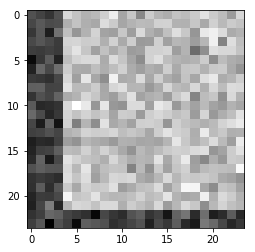

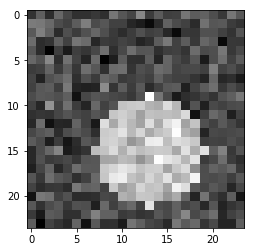

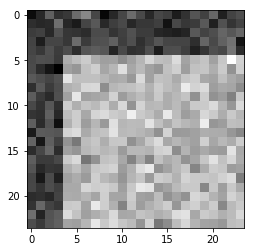

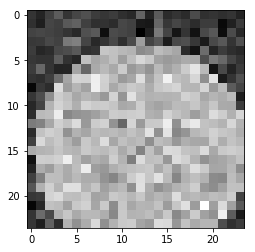

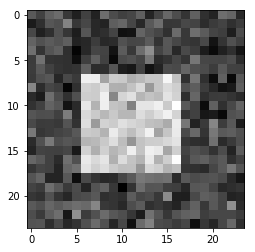

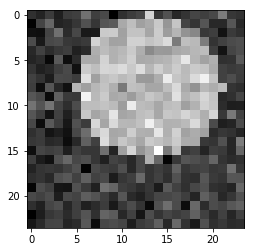

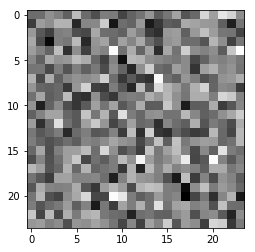

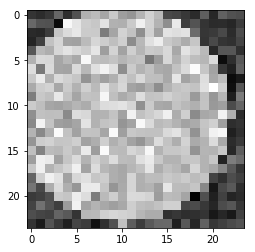

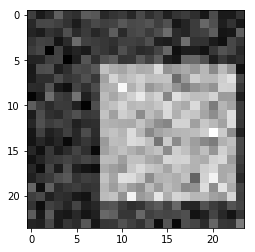

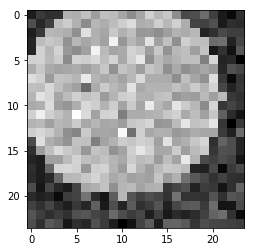

In [75]:
# display some training images
for i in range(10):
    first_image = x_train[i,:,:,0] 
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [76]:
# type casting and dimensionality transformations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(nmb_samples, img_rows*img_cols)
x_test = x_test.reshape(nmb_test_samples, img_rows*img_cols)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (200, 576)
200 train samples
200 test samples


In [67]:
# convert class vectors to binary class matrices (one hot vectors)
y_train = keras.utils.to_categorical(np.squeeze(y_train), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(y_test), num_classes)

In [68]:
# define MLP model (2 hidden layers with 512 nodes, activated by ReLUs)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [69]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [70]:
# training
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 1s 4ms/step - loss: 1.1899 - acc: 0.5200 - val_loss: 0.6577 - val_acc: 0.6450
Epoch 2/200
200/200 [==============================] - 0s 805us/step - loss: 0.7436 - acc: 0.5950 - val_loss: 0.7047 - val_acc: 0.5050
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 0.7279 - acc: 0.5200 - val_loss: 0.6768 - val_acc: 0.5550
Epoch 4/200
200/200 [==============================] - 0s 779us/step - loss: 0.6906 - acc: 0.5500 - val_loss: 0.7000 - val_acc: 0.5100
Epoch 5/200
200/200 [==============================] - 0s 895us/step - loss: 0.6978 - acc: 0.5350 - val_loss: 0.6815 - val_acc: 0.4950
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.6297 - acc: 0.6550 - val_loss: 0.6283 - val_acc: 0.7050
Epoch 7/200
200/200 [==============================] - 0s 1ms/step - loss: 0.5987 - acc: 0.6850 - val_loss: 0.6576 - val_acc: 0.5250
Epoch 8/200
200/2

200/200 [==============================] - 0s 636us/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.3274 - val_acc: 0.8700
Epoch 62/200
200/200 [==============================] - 0s 632us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.3278 - val_acc: 0.8700
Epoch 63/200
200/200 [==============================] - 0s 732us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.3304 - val_acc: 0.8600
Epoch 64/200
200/200 [==============================] - 0s 626us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.3364 - val_acc: 0.8650
Epoch 65/200
200/200 [==============================] - 0s 621us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4815 - val_acc: 0.8350
Epoch 66/200
200/200 [==============================] - 0s 552us/step - loss: 0.7200 - acc: 0.7600 - val_loss: 0.3570 - val_acc: 0.8550
Epoch 67/200
200/200 [==============================] - 0s 593us/step - loss: 0.0403 - acc: 1.0000 - val_loss: 0.3226 - val_acc: 0.8650
Epoch 68/200
200/200 [==============================] - 0s 57

Epoch 121/200
200/200 [==============================] - 0s 571us/step - loss: 4.0703e-04 - acc: 1.0000 - val_loss: 0.3947 - val_acc: 0.8650
Epoch 122/200
200/200 [==============================] - 0s 586us/step - loss: 3.2281e-04 - acc: 1.0000 - val_loss: 0.4097 - val_acc: 0.8800
Epoch 123/200
200/200 [==============================] - 0s 611us/step - loss: 3.2802e-04 - acc: 1.0000 - val_loss: 0.3965 - val_acc: 0.8750
Epoch 124/200
200/200 [==============================] - 0s 577us/step - loss: 2.7761e-04 - acc: 1.0000 - val_loss: 0.4443 - val_acc: 0.8700
Epoch 125/200
200/200 [==============================] - 0s 575us/step - loss: 2.8666e-04 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.8750
Epoch 126/200
200/200 [==============================] - 0s 565us/step - loss: 2.5790e-04 - acc: 1.0000 - val_loss: 0.4079 - val_acc: 0.8750
Epoch 127/200
200/200 [==============================] - 0s 561us/step - loss: 2.4075e-04 - acc: 1.0000 - val_loss: 0.4206 - val_acc: 0.8800
Epoch 128/200

200/200 [==============================] - 0s 766us/step - loss: 6.8781e-05 - acc: 1.0000 - val_loss: 0.4464 - val_acc: 0.8750
Epoch 180/200
200/200 [==============================] - 0s 723us/step - loss: 6.7235e-05 - acc: 1.0000 - val_loss: 0.4342 - val_acc: 0.8800
Epoch 181/200
200/200 [==============================] - 0s 627us/step - loss: 6.7120e-05 - acc: 1.0000 - val_loss: 0.4374 - val_acc: 0.8850
Epoch 182/200
200/200 [==============================] - 0s 611us/step - loss: 6.5761e-05 - acc: 1.0000 - val_loss: 0.4520 - val_acc: 0.8800
Epoch 183/200
200/200 [==============================] - 0s 697us/step - loss: 6.5170e-05 - acc: 1.0000 - val_loss: 0.4461 - val_acc: 0.8800
Epoch 184/200
200/200 [==============================] - 0s 879us/step - loss: 6.3814e-05 - acc: 1.0000 - val_loss: 0.4503 - val_acc: 0.8750
Epoch 185/200
200/200 [==============================] - 0s 612us/step - loss: 6.2980e-05 - acc: 1.0000 - val_loss: 0.4644 - val_acc: 0.8700
Epoch 186/200
200/200 [====

In [71]:
# print train and test losses and classification accuracies
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 5.154571117600426e-05
Train accuracy: 1.0
Test loss: 0.4468630075454712
Test accuracy: 0.88


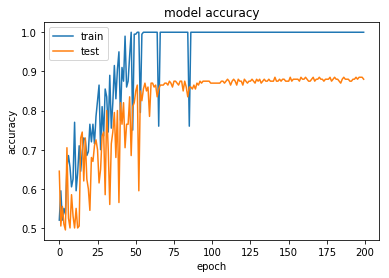

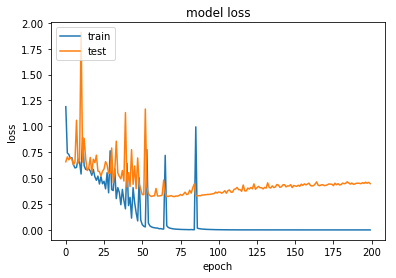

In [72]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()